<a href="https://colab.research.google.com/github/SebastianHerrera549/Ciclo-For/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero hacemos imports de librerías que utilizaremos para manejo de datos, gráficas y nuestro algoritmo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
PATH = '/content/drive/My Drive/Univercidad/2021-1/Sistemas Expertos/'

Cargamos el archivo entrada csv con pandas, usando separador de punto y coma, pues en las reviews hay textos que usan coma. Con head(10) vemos los 10 primeros registros.

In [ ]:
datasetPath = PATH + 'winequality.csv'
wine = pd.read_csv(datasetPath) 

In [ ]:
wine.head(10)

In [ ]:
print(wine.groupby('quality').size())

Preparamos las entradas
Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [ ]:
X = wine[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol' ]].values
y = wine['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Usemos k-Nearest Neighbor con Scikit Learn
Definimos el valor de k en 2 (esto realmente lo sabemos más adelante, ya veréis) y creamos nuestro clasificador.

In [ ]:
n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión del clasificador K-NN en el equipo de prueba: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión del clasificador K-NN en el conjunto de entrenamiento: 0.80
Precisión del clasificador K-NN en el equipo de prueba: 0.59


Precisión del modelo
Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

([<matplotlib.axis.XTick at 0x7f73d53aa5d0>,
 <a list of 21 Text major ticklabel objects>)

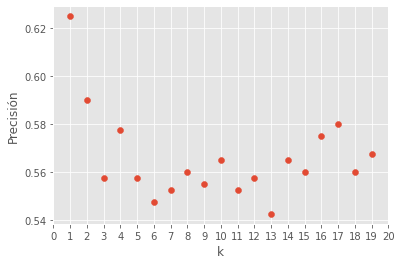

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Precisión')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) #,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

In [ ]:
model =clf.predict([[7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4	]])
print(model)

In [ ]:
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.61      0.66      0.63       169
           6       0.55      0.59      0.57       170
           7       0.37      0.33      0.35        40
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.26      0.26      0.26       400
weighted avg       0.53      0.56      0.54       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
